# **Ejercicio Semana 2: Funciones de transformaciones 2D**

Visión por Computador

Ingeniería Agronómica

Monica Paola Vargas Tirado

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv

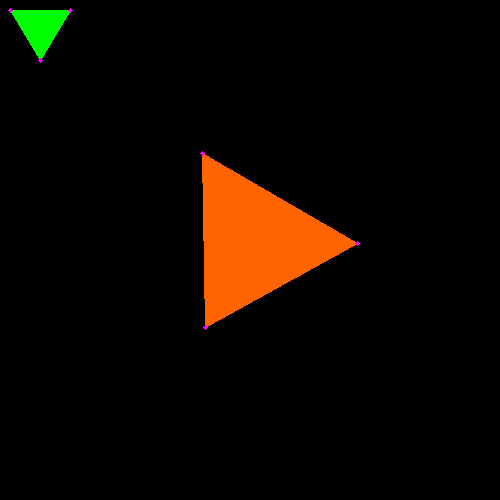

In [ ]:
def draw_triangle(im, triangle, color=(0,255,0)):
    # Normalizar coordenadas homogeneas
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)

def scale(vertex, sx, sy):
    scale_matrix = np.array([[sx, 0, 0],
                            [0, sy, 0],
                            [0, 0, 1]])

    # Aplicar la matriz de traslación al triángulo
    scale_triangle = np.dot(scale_matrix, vertex.T).T # T : Para transponer

    return scale_triangle

def rotate(vertex, a):
    # Convertir el ángulo a radianes
    a = np.radians(a)

    # Crear la matriz de rotación
    rotation_matrix = np.array([[np.cos(a), -np.sin(a), 0],
                                [np.sin(a), np.cos(a), 0],
                                [0, 0, 1]])

    # Aplicar la matriz de rotación al triángulo
    rotated_triangle = np.dot(rotation_matrix, vertex.T).T

    return rotated_triangle

def translate(vertex, dx, dy):
    translation_matrix = np.array([[1, 0, dx],
                                    [0, 1, dy],
                                    [0, 0, 1]])

    # Aplicar la matriz de traslación al triángulo
    translated_triangle = np.dot(translation_matrix, vertex.T).T

    return translated_triangle

# Tamaño de la imagen
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

# Parametros de las transformaciones
# Traslada a centro y realiza escala y rotacion
angle = 30
s = 3
t = 250
# Sistema coordenado de imagenes
triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
triangle2 = translate(rotate( scale(translate(triangle1, -40,-30),s,s) ,angle), t,t)


draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color= (0,100,255))


cv2_imshow(im)
